# Importing libraries

In [10]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Reading Images

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


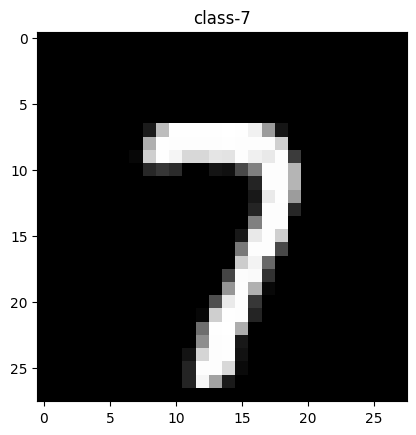

Train image 13512-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  27 189 254 254 254 254 255 254 241 156
   21   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 1

In [11]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ML/SS_assignments_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
# rand_ids=12553
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Shapes

In [12]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# Selecting random 600 samples from each class

In [13]:
def select_random_samples(matrix, labels, num_samples_per_label):
    selected_samples = []
    selected_labels = []
    unique_labels = np.unique(labels)

    for label in unique_labels:
        indices = np.where(labels == label)[0]
        selected_indices = np.random.choice(indices, size=num_samples_per_label, replace=False)
        selected_samples.extend(matrix[selected_indices])
        selected_labels.extend(labels[selected_indices])

    selected_samples = np.array(selected_samples)
    selected_labels = np.array(selected_labels)

    return selected_samples, selected_labels

data = train_images    # Example random data
labels = train_labels  # Example random labels

num_samples_per_label = 600
selected_data, selected_labels = select_random_samples(data, labels, num_samples_per_label)

shuffle_indices = np.random.permutation(selected_data.shape[0])
shuffled_data = selected_data[shuffle_indices]
shuffled_labels = selected_labels[shuffle_indices]

print("Shape of shuffled data:", shuffled_data.shape)
print("Shape of shuffled labels:", shuffled_labels.shape)


Shape of shuffled data: (6000, 28, 28)
Shape of shuffled labels: (6000,)


#### Seeing a sample 

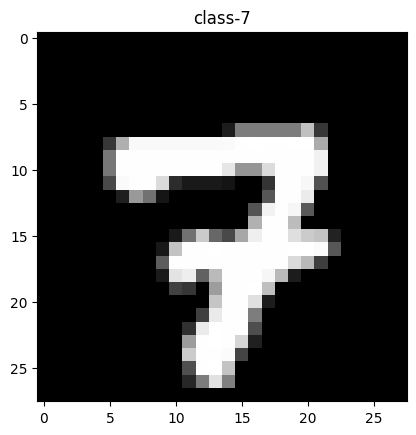

In [14]:

plt.imshow(shuffled_data[0], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

# MDS function

In [18]:
def euclidean_distance(x1, x2):
    """Compute the Euclidean distance between two points"""
    return np.sqrt(np.sum((x1 - x2) ** 2))

def pairwise_distances(X):
    """Compute pairwise distances between all points in the dataset"""
    n_points = X.shape[0]
    D = np.zeros((n_points, n_points))
    for i in range(n_points):
        for j in range(i + 1, n_points):
            D[i, j] = euclidean_distance(X[i], X[j])
            D[j, i] = D[i, j]  
    return D

def mds(distances, n_components=2):
    """Multi-dimensional Scaling (MDS)"""
    n_points = distances.shape[0]
    
    # Centering matrix
    H = np.eye(n_points) - np.ones((n_points, n_points)) / n_points
    
    # Double centering
    B = -0.5 * (H.dot(distances**2).dot(H))
    
    eigenvalues, eigenvectors = np.linalg.eigh(B)
    
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    
    eigenvalues = eigenvalues[:n_components]
    eigenvectors = eigenvectors[:, :n_components]
    
    X_reduced = eigenvectors * np.sqrt(eigenvalues)
    
    return X_reduced

# Plotting

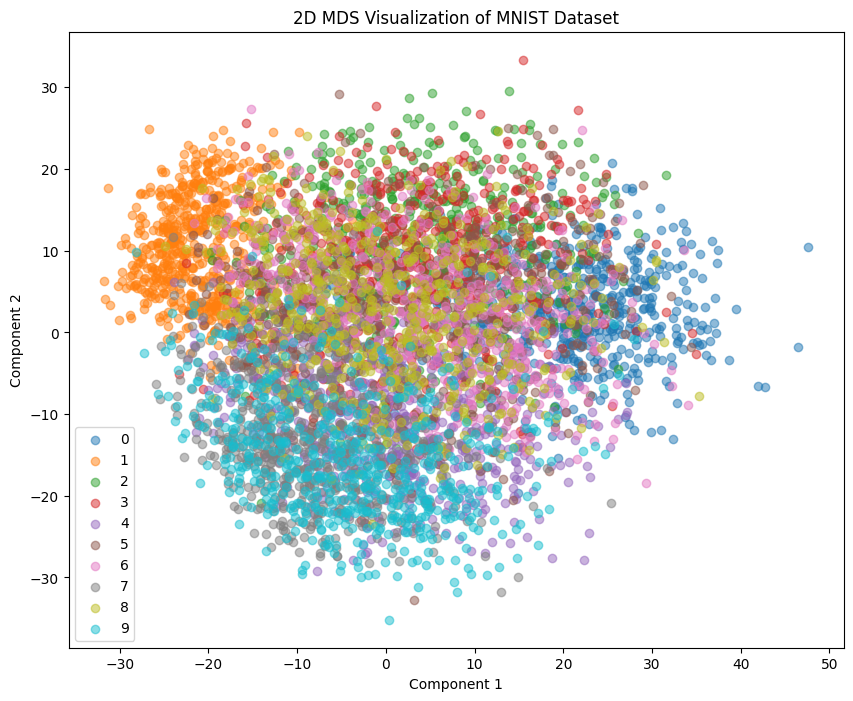

In [19]:
train_images_sampled_flat = shuffled_data.reshape(shuffled_data.shape[0], -1)

distance_matrix = pairwise_distances(train_images_sampled_flat)

X_2d = mds(distance_matrix)

plt.figure(figsize=(10, 8))
for i in range(10):
    class_indices = np.where(shuffled_labels == i)[0]
    plt.scatter(X_2d[class_indices, 0], X_2d[class_indices, 1], label=str(i), alpha=0.5)
plt.title('2D MDS Visualization of MNIST Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()
